In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [14]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

# task 1

## read data

In [4]:
sku_df = pd.read_csv('HW_6_data.csv')
sku_df['dates'] = pd.to_datetime(sku_df.dates)
sku_df.head()

,dates,SKU,price_per_sku
0,2018-11-05,12538,137.0
1,2018-11-08,12538,137.0
2,2018-11-09,12538,137.0
3,2018-11-10,12538,137.0
4,2018-11-11,12538,137.0


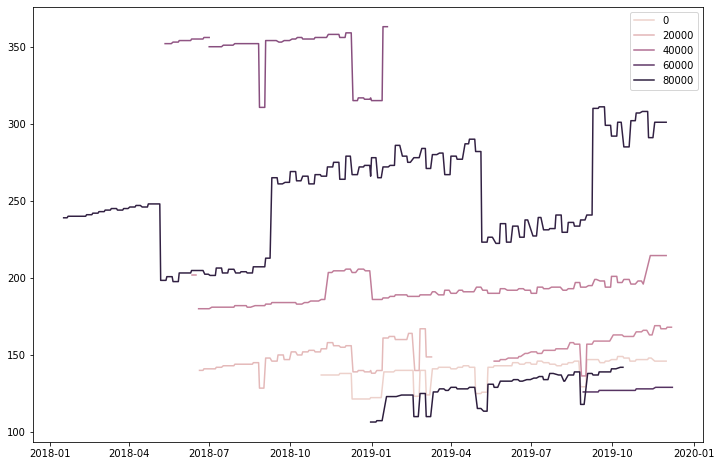

In [6]:
## plot data
plt.figure(figsize=(12, 8))
# sns.lineplot(data=gr_table[['dates', 'SKU', 'price_per_sku']], x = )
# sns.lineplot(x = gr_table['dates'], y = gr_table['price_per_sku'], hue=gr_table['SKU'])
sns.lineplot(x = sku_df.dates.values, 
             y = sku_df.price_per_sku.values,
             hue = sku_df.SKU.values.astype(str),
             dashes=False,
            )



In [10]:
sku_pivot = sku_df.pivot_table(index='dates', columns='SKU', values='price_per_sku')
sku_df.head()

,dates,SKU,price_per_sku
0,2018-11-05,12538,137.0
1,2018-11-08,12538,137.0
2,2018-11-09,12538,137.0
3,2018-11-10,12538,137.0
4,2018-11-11,12538,137.0


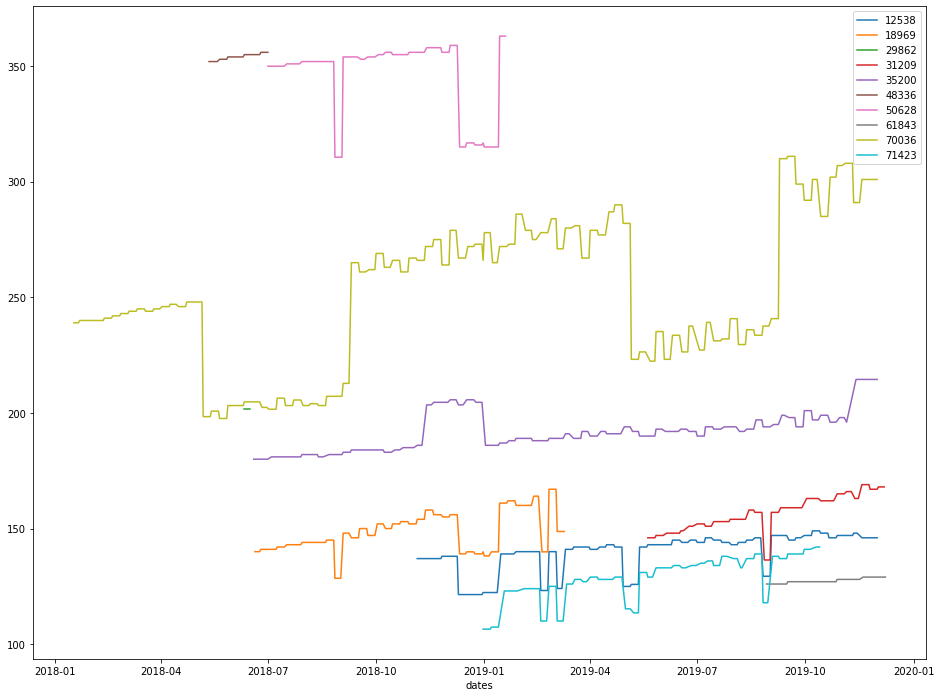

In [13]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=sku_pivot, dashes=False)

In [ ]:
## EXAMPLE
# Create a line (trace) for the global sales
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df['Global_Sales'],
    name='Global Sales'
)

# Create a line (trace) for the number of games released
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df['Number_of_Games'],
    name='Number of games released'
)

# Define the data array
data = [trace0, trace1]

# Set the title
layout = {'title': 'Statistics for video games'}

# Create a Figure and plot it
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [17]:
trace_list = []
sku_list = sku_df.SKU.unique()

for sku_i in sku_list:
    trace = go.Scatter(
        x=sku_df.loc[sku_df.SKU == sku_i, 'dates'],
        y=sku_df.loc[sku_df.SKU == sku_i, 'price_per_sku'],
        name=sku_i.astype(str)
    )
    trace_list.append(trace)

## plotly prices

In [21]:
plt.figure(figsize=(12, 8))
layout = {'title': 'SKU prices'}
fig = go.Figure(data=trace_list, layout=layout)
iplot(fig, show_link=False)

<Figure size 864x576 with 0 Axes>

## write answer

In [47]:
## classes of seasonality
cl_1 = '12538,18969,31209,50628,71423' # holidays weeks - CORRECT
cl_2 = '70036' # summer weeks - CORRECT
cl_3 = '35200' # pre-NY weeks - CORRECT


In [48]:
task_1_ans_total = [cl_1, cl_2, cl_3]
task_1_ans_total

['12538,18969,31209,50628,71423', '70036', '35200']

In [49]:
df_ans_total = pd.DataFrame(task_1_ans_total)
df_ans_total

,0
0,"12538,18969,31209,50628,71423"
1,70036
2,35200


In [50]:
df_ans_total.to_csv(path_or_buf = 'part1.txt', columns = None, index = None, header = None, escapechar = " ",  quoting=csv.QUOTE_NONE)

# task 2 (modeling)

## read data

In [180]:
sku_df = pd.read_csv('HW_6_data.csv')
sku_df['dates'] = pd.to_datetime(sku_df.dates)
sku_df.head()

,dates,SKU,price_per_sku
0,2018-11-05,12538,137.0
1,2018-11-08,12538,137.0
2,2018-11-09,12538,137.0
3,2018-11-10,12538,137.0
4,2018-11-11,12538,137.0


In [181]:
sku_test_df = pd.read_csv('HW_6_test.csv')
sku_test_df['dates'] = pd.to_datetime(sku_test_df.dates)
sku_test_df.head()

,SKU,dates
0,12538,2019-12-02
1,12538,2019-12-09
2,12538,2019-12-16
3,12538,2019-12-26
4,18969,2019-03-11


In [182]:
sku_test_df

,SKU,dates
0,12538,2019-12-02
1,12538,2019-12-09
2,12538,2019-12-16
3,12538,2019-12-26
4,18969,2019-03-11
5,18969,2019-03-18
6,18969,2019-03-25
7,18969,2019-04-01
8,31209,2019-12-09
9,31209,2019-12-17


## prophet forecast

### test for 1 SKU

In [183]:
from fbprophet import Prophet

In [184]:
sku_test_df.SKU.unique()

array([12538, 18969, 31209, 35200, 48336, 50628, 61843, 70036, 71423])

In [235]:
sku_df_1 = sku_df.loc[sku_df.SKU == 12538, ]
sku_test_df_1 = sku_test_df.loc[sku_test_df.SKU == 12538, ]
sku_df_1.head()

,dates,SKU,price_per_sku
0,2018-11-05,12538,137.0
1,2018-11-08,12538,137.0
2,2018-11-09,12538,137.0
3,2018-11-10,12538,137.0
4,2018-11-11,12538,137.0


In [236]:
plt.figure(figsize=(12, 8))
layout = {'title': 'SKU prices'}
fig = go.Figure(data=trace_list, layout=layout)
iplot(fig, show_link=False)

<Figure size 864x576 with 0 Axes>

In [237]:
## classes of seasonality
cl_1 = [12538,18969,31209,50628,71423] # holidays weeks - CORRECT
cl_2 = [70036] # summer weeks - CORRECT
cl_3 = [35200] # pre-NY weeks - CORRECT

In [246]:
## calendar effects periods

# holydays
holidays_weeks = pd.DataFrame({
  'holiday': 'holidays_weeks',
  'ds': pd.date_range('2018-08-27', '2018-09-02', freq='D')\
    .append(pd.date_range('2019-08-26', '2019-09-01', freq='D'))\
    .append(pd.date_range('2018-02-18', '2018-02-24', freq='D'))\
    .append(pd.date_range('2019-02-18', '2019-02-24', freq='D'))\
    .append(pd.date_range('2018-03-04', '2018-03-10', freq='D'))\
    .append(pd.date_range('2019-03-04', '2019-03-10', freq='D'))\
    .append(pd.date_range('2018-04-29', '2018-05-12', freq='D'))\
    .append(pd.date_range('2019-04-29', '2019-05-12', freq='D'))\
    .append(pd.date_range('2018-12-10', '2019-01-13', freq='D'))\
    .append(pd.date_range('2019-12-09', '2020-01-13', freq='D')),
  'lower_window': 0,
  'upper_window': 0,
})

# SKU == 70036
summer_weeks = pd.DataFrame({
  'holiday': 'summer_weeks',
  'ds': pd.date_range('2018-05-06', '2018-09-08', freq='D')\
    .append(pd.date_range('2019-05-06', '2019-09-08', freq='D')),
  'lower_window': 0,
  'upper_window': 0,
})

# preNY_weeks_1 = pd.DataFrame({
#   'holiday': 'preNY_weeks_1',
#   'ds': pd.date_range('2018-12-10', '2019-01-13', freq='D')\
#     .append(pd.date_range('2019-12-10', '2020-01-13', freq='D')),
#   'lower_window': 0,
#   'upper_window': 0,
# })

# SKU == 35200
preNY_weeks_2 = pd.DataFrame({
  'holiday': 'preNY_weeks_2',
  'ds': pd.date_range('2018-12-10', '2019-01-13', freq='D')\
    .append(pd.date_range('2019-12-10', '2020-01-13', freq='D')),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_cl1 = holidays_weeks
holidays_cl2 = summer_weeks
holidays_cl3 = preNY_weeks_2

In [ ]:
# ## EXAMPLE
# # Python
# playoffs = pd.DataFrame({
#   'holiday': 'playoff',
#   'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
#                         '2010-01-24', '2010-02-07', '2011-01-08',
#                         '2013-01-12', '2014-01-12', '2014-01-19',
#                         '2014-02-02', '2015-01-11', '2016-01-17',
#                         '2016-01-24', '2016-02-07']),
#   'lower_window': 0,
#   'upper_window': 1,
# })
# superbowls = pd.DataFrame({
#   'holiday': 'superbowl',
#   'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
#   'lower_window': 0,
#   'upper_window': 1,
# })
# holidays = pd.concat((playoffs, superbowls))

In [247]:
# m = Prophet()
# m.add_country_holidays(country_name='RU')
# m.fit(sku_df_1.rename(columns={'dates':'ds','price_per_sku':'y'}))
# print(m.train_holiday_names)

In [266]:
# prophet = Prophet(yearly_seasonality=10)
prophet = Prophet(yearly_seasonality=False, holidays=holidays_cl1, interval_width = 0.95)
prophet.fit(sku_df_1[['dates', 'price_per_sku']].rename(columns={'dates':'ds','price_per_sku':'y'}))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [267]:
# pred_df = prophet.predict(sku_test_df_1[['dates']].rename(columns={'dates':'ds'}))
pred_df = prophet.predict(sku_test_df_1[['dates']].rename(columns={'dates':'ds'}))

In [268]:
pred_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,holidays_weeks,holidays_weeks_lower,holidays_weeks_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-12-02,146.763110,145.661850,148.223702,146.761659,146.764233,0.166404,0.166404,0.166404,0.000000,...,0.000000,0.000000,0.000000,0.166404,0.166404,0.166404,0.0,0.0,0.0,146.929514
1,2019-12-09,146.745927,128.829707,131.322775,146.581440,146.903545,-16.683719,-16.683719,-16.683719,-16.850123,...,-16.850123,-16.850123,-16.850123,0.166404,0.166404,0.166404,0.0,0.0,0.0,130.062209
2,2019-12-16,146.728745,128.773753,131.257975,146.281523,147.132249,-16.683719,-16.683719,-16.683719,-16.850123,...,-16.850123,-16.850123,-16.850123,0.166404,0.166404,0.166404,0.0,0.0,0.0,130.045026
3,2019-12-26,146.704198,128.295740,131.414316,145.788079,147.495876,-16.823738,-16.823738,-16.823738,-16.850123,...,-16.850123,-16.850123,-16.850123,0.026385,0.026385,0.026385,0.0,0.0,0.0,129.880459


In [269]:
pd.DataFrame({'SKU': 100, 'date': pred_df.ds, 'lower': pred_df.yhat_lower, 'upper': pred_df.yhat_upper})

,SKU,date,lower,upper
0,100,2019-12-02,145.661850,148.223702
1,100,2019-12-09,128.829707,131.322775
2,100,2019-12-16,128.773753,131.257975
3,100,2019-12-26,128.295740,131.414316


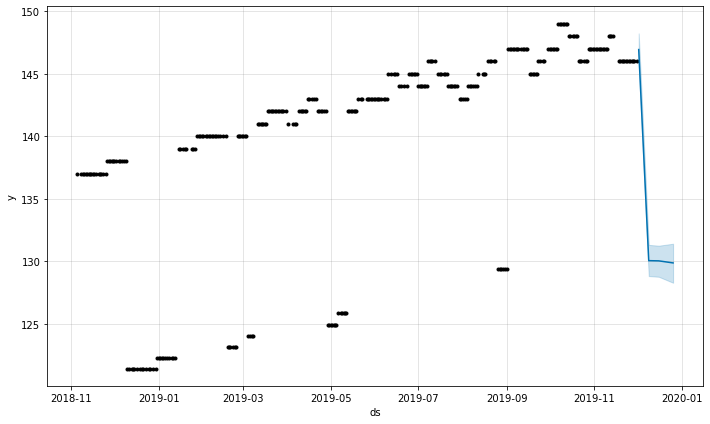

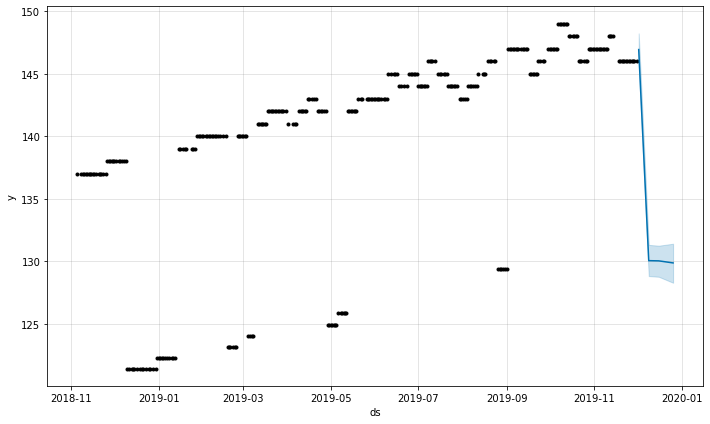

In [270]:
prophet.plot(pred_df)

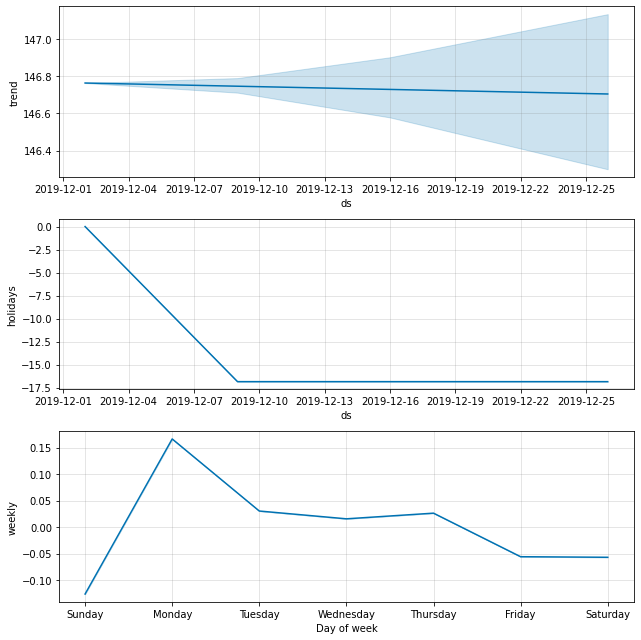

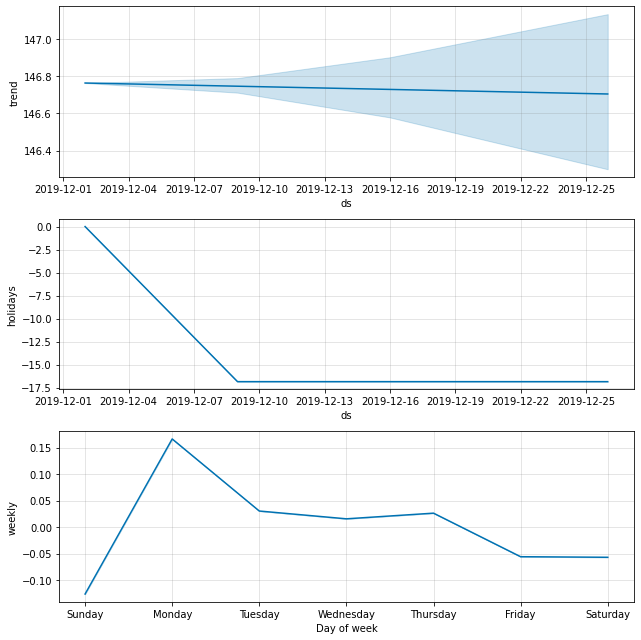

In [253]:
prophet.plot_components(pred_df)

### predict all SKU by prophet

In [271]:
sku_list = sku_test_df.SKU.unique()
sku_list

array([12538, 18969, 31209, 35200, 48336, 50628, 61843, 70036, 71423])

In [290]:
%%time
column_names = ["SKU", "dates", "predicted_lower_bound", "predicted_upper_bound"]
predict_prophet_df = pd.DataFrame(columns = column_names)
conf_int = 0.99999

for sku_i in sku_list:
    
    # select calendar effects type
    if (sku_i in cl_1):
        prophet = Prophet(interval_width = conf_int, holidays=holidays_cl1)
    elif (sku_i in cl_2):
        prophet = Prophet(interval_width = conf_int, holidays=holidays_cl2)
    elif (sku_i in cl_3):
        prophet = Prophet(interval_width = conf_int, holidays=holidays_cl3)
    else:
        prophet = Prophet(interval_width = conf_int)
    
    # subset data & fit prophet
    sku_df_i = sku_df.loc[sku_df.SKU == sku_i, ]
    sku_test_df_i = sku_test_df.loc[sku_test_df.SKU == sku_i, ]
    prophet.fit(sku_df_i[['dates', 'price_per_sku']].rename(columns={'dates':'ds','price_per_sku':'y'}))
    
    # predict price interval
    pred_df1_i = prophet.predict(sku_test_df_i[['dates']].rename(columns={'dates':'ds'}))
    pred_df2_i = pd.DataFrame({'SKU': sku_i, 'dates': pred_df1_i.ds,\
                              'predicted_lower_bound': pred_df1_i.yhat_lower,\
                              'predicted_upper_bound': pred_df1_i.yhat_upper})
    
    # attach to total df
    predict_prophet_df = predict_prophet_df.append(pred_df2_i)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

CPU times: user 28.9 s, sys: 928 ms, total: 29.8 s
Wall time: 29.5 s


In [291]:
predict_prophet_df

,SKU,dates,predicted_lower_bound,predicted_upper_bound
0,12538,2019-12-02,144.708330,148.830930
1,12538,2019-12-09,128.121292,132.492825
2,12538,2019-12-16,127.775905,132.252959
3,12538,2019-12-26,127.155753,132.837052
0,18969,2019-03-11,162.279021,170.960329
1,18969,2019-03-18,163.587899,172.450644
2,18969,2019-03-25,163.337479,173.135142
3,18969,2019-04-01,165.531528,174.487790
0,31209,2019-12-09,145.014772,151.655867
1,31209,2019-12-17,145.577482,152.354449


## write forecast

In [292]:
predict_prophet_df.to_csv('part2.csv', index=False)